0
[[-27.115949  ]
 [ -2.26715842]
 [-17.52424952]]
---
x_new[ 0 ]: [[-7.115949  ]
 [17.73284158]
 [ 2.47575048]]
1
[[  8.55410518]
 [-28.75658674]
 [ -0.51817998]]
---
x_new[ 1 ]: [[  1.43815618]
 [-11.02374516]
 [  1.9575705 ]]
2
[[nan]
 [nan]
 [nan]]
---
x_new[ 2 ]: [[nan]
 [nan]
 [nan]]


C:\Users\enmao\AppData\Local\Temp\ipykernel_9700\3128720689.py:26: RuntimeWarning: invalid value encountered in power
  func1 = lambda x: c-kappa*x[1]**(-zeta)*(1-s)*(x[2]-y_u)
C:\Users\enmao\AppData\Local\Temp\ipykernel_9700\3128720689.py:35: RuntimeWarning: invalid value encountered in power
  func3 = lambda x: x[0]-n*(1-kappa*x[1]**(1-zeta))+(n-x[0])*s


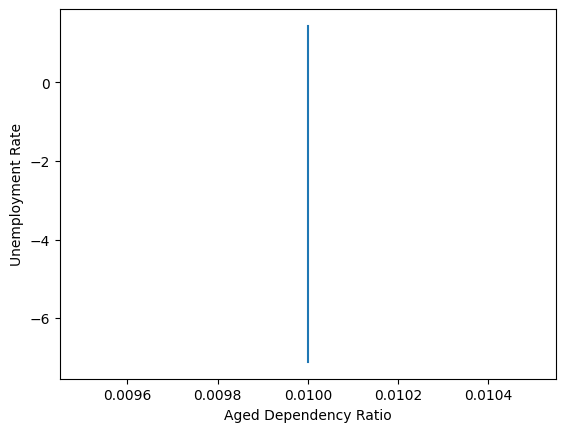

In [28]:
#plot large range of a, then zoom in some smaller range
# multivariate Newton Rhapson method to solve nonlinear system
import autograd.numpy as np
from autograd import grad, jacobian

import matplotlib.pyplot as plt

n = 1
a = 0.4
s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1
n = 1
y_u = 0.4
y_a = 0.4
bar_p = 1
c = 0.2
# let the matching function in labor market 
# m(u,v)=kappa*u**zeta*v**(1-zeta) 
kappa = 0.5
zeta = 0.35

#b = lambda x: (n-x[0])*(1+psi_e)+x[0]*(1+psi_u)+a*(1+psi_a)
# w = (1-s)*y_u + s*x[2]

func1 = lambda x: c-kappa*x[1]**(-zeta)*(1-s)*(x[2]-y_u)
func2 = lambda x: ((n-x[0])*(1+psi_e)*(1-2*psi_e/(1+psi_e)*(n-x[0])/\
                                       ((n-x[0])*(1+psi_e)+x[0]*(1+psi_u)+a*(1+psi_a)))
                   *((1-s)*y_u + s*x[2])/bar_p*(bar_p-c)\
                   +x[0]*(1+psi_u)*(1-2*psi_u/(1+psi_u)*(n-x[0])/\
                                  ((n-x[0])*(1+psi_e)+x[0]*(1+psi_u)+a*(1+psi_a)))\
                *y_u/bar_p*(bar_p-c)\
+a*(1+psi_a)*(1-2*psi_a/(1+psi_a)*(n-x[0])/((n-x[0])*(1+psi_e)+x[0]*(1+psi_u)+a*(1+psi_a)))\
*y_a/bar_p*(bar_p-c))/((n-x[0])*(1+psi_e)+x[0]*(1+psi_u)+a*(1+psi_a))-x[2]
func3 = lambda x: x[0]-n*(1-kappa*x[1]**(1-zeta))+(n-x[0])*s

#for i in range(3):
jac_func1 = jacobian(func1)
jac_func2 = jacobian(func2)
jac_func3 = jacobian(func3)

i = 0
error =100
tol = 10**(-4)
maxiter = 10**2
M = 3
N = 3
x_0 = np.array([20,20,20],dtype=float).reshape(N,1)

unemp = []
tight_labor = []
net_profit = []
aging = []

for a in np.arange(0.01, 1, 0.1):
    while np.any(abs(error) > tol) and i < maxiter:
        fun_evaluate = np.array([func1(x_0), func2(x_0), func3(x_0)]).reshape(M,1)
        flat_x_0 = x_0.flatten()

        jac = np.array([jac_func1(flat_x_0), jac_func2(flat_x_0),jac_func3(flat_x_0)])
        jac = jac.reshape(N,M)

        x_new = x_0 - np.linalg.inv(jac)@fun_evaluate

        error = x_new - x_0

        x_0 = x_new
        print(i)
        print(error)
        print('---')
        print('x_new[',i, ']:', x_new)
        
        i += 1
        
        unemp.append(x_new[0])
        aging.append(a)
        
plt.figure()
#plt.subplot(211)
plt.plot(aging, unemp)
plt.xlabel('Aged Dependency Ratio')
plt.ylabel('Unemployment Rate')

plt.show()

In [23]:
unemp

[array([-1.57480712]),
 array([-1.36354511]),
 array([-1.10258958]),
 array([-0.8141161]),
 array([-0.56824526]),
 array([-0.43761832]),
 array([-0.40936787]),
 array([-0.40825935]),
 array([-0.40825772])]